In [22]:
from sklearn import neighbors
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler, binarize
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read Dataset

In [3]:
df = pd.read_excel('Dataset/Dataset.xlsx')

# with pd.option_context('display.max_rows', 6): display(df)

display(df)

,No,Mangosteen Weight (g),Roundness,Upper Petal,Lower Petal,Max Frequency (Hz),Max Magnitude,Sweetness (%Brix),Class
0,1,105.67,0.945,4,6,184.22,48.24,19.000,1
1,3,79.57,0.910,4,5,186.97,17.57,15.375,0
2,4,69.13,0.955,4,6,184.55,26.90,18.660,1
3,5,77.55,0.964,4,5,185.60,40.53,22.000,1
4,6,99.95,0.895,4,6,184.49,42.64,19.250,1
...,...,...,...,...,...,...,...,...,...
83,113,51.26,0.973,4,6,107.58,18.68,20.000,1
84,114,70.70,0.959,4,5,96.98,23.66,14.750,0
85,117,46.69,0.935,4,6,NaN,18.86,18.000,0
86,118,47.86,0.950,4,5,213.76,22.81,18.875,1


# Fill NaN with Mean

In [4]:
roundness_mean = df['Roundness'].mean()
max_frequency_mean = df['Max Frequency (Hz)'].mean()

print(f'Roundness Mean: {roundness_mean}')
print(f'Max Frequency (Hz) Mean: {max_frequency_mean}')

df['Roundness'].fillna(roundness_mean, inplace=True)
df['Max Frequency (Hz)'].fillna(max_frequency_mean, inplace=True)

Roundness Mean: 0.9453809523809524
Max Frequency (Hz) Mean: 139.62136363636367


# Features Selection

<Axes: >

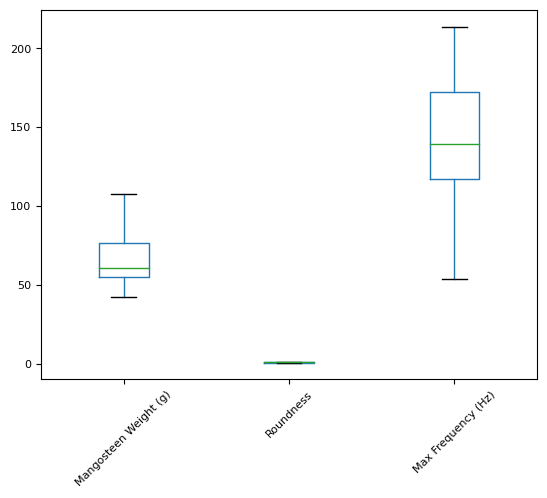

In [5]:
feature = ['Mangosteen Weight (g)', 'Roundness', 'Max Frequency (Hz)']
X = df[feature]
y = df['Class']

display(df.boxplot(column=feature, grid=False, rot=45, fontsize=8))

# Data Visualization

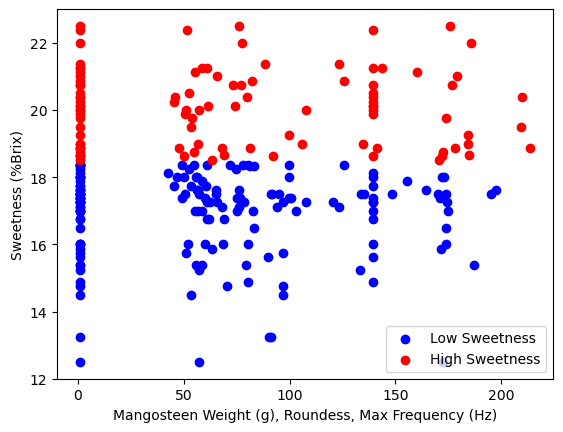

In [6]:
class_0 = df[y == 0]
class_1 = df[y == 1]

plt.xlabel('Mangosteen Weight (g), Roundess, Max Frequency (Hz)')
plt.ylabel('Sweetness (%Brix)')

plt.scatter(class_0['Mangosteen Weight (g)'], class_0['Sweetness (%Brix)'], color='b', label='Low Sweetness')
plt.scatter(class_1['Mangosteen Weight (g)'], class_1['Sweetness (%Brix)'], color='r', label='High Sweetness')

plt.scatter(class_0['Roundness'], class_0['Sweetness (%Brix)'], color='b')
plt.scatter(class_1['Roundness'], class_1['Sweetness (%Brix)'], color='r')

plt.scatter(class_0['Max Frequency (Hz)'], class_0['Sweetness (%Brix)'], color='b')
plt.scatter(class_1['Max Frequency (Hz)'], class_1['Sweetness (%Brix)'], color='r')

plt.legend(loc='best')
plt.show()

# Hyperparameter

In [7]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

## KNN

In [8]:
KNN = neighbors.KNeighborsClassifier()
KNN_parameter = {
    'leaf_size': list(range(1, 15)),
    'n_neighbors': list(range(1, 10, 2)),
    'p': [1, 2]
}

grid_search = GridSearchCV(estimator=KNN, param_grid=KNN_parameter, cv=k_fold.split(X), n_jobs=4, verbose=3)
grid_search.fit(X, y)

print('KNN Best Score: ', grid_search.best_score_)
print('KNN Best Parameter: ', grid_search.best_params_)

Fitting 10 folds for each of 140 candidates, totalling 1400 fits
[CV 4/10] END ..leaf_size=1, n_neighbors=1, p=1;, score=0.333 total time=   0.0s
[CV 8/10] END ..leaf_size=1, n_neighbors=1, p=1;, score=0.667 total time=   0.0s
[CV 2/10] END ..leaf_size=1, n_neighbors=1, p=2;, score=0.333 total time=   0.0s
[CV 6/10] END ..leaf_size=1, n_neighbors=1, p=2;, score=0.556 total time=   0.0s
[CV 10/10] END .leaf_size=1, n_neighbors=1, p=2;, score=0.750 total time=   0.0s
[CV 4/10] END ..leaf_size=1, n_neighbors=3, p=1;, score=0.444 total time=   0.0s
[CV 9/10] END ..leaf_size=1, n_neighbors=3, p=1;, score=0.500 total time=   0.0s
[CV 10/10] END .leaf_size=1, n_neighbors=3, p=1;, score=0.750 total time=   0.0s
[CV 5/10] END ..leaf_size=1, n_neighbors=3, p=2;, score=0.556 total time=   0.0s
[CV 6/10] END ..leaf_size=1, n_neighbors=3, p=2;, score=0.556 total time=   0.0s
[CV 9/10] END ..leaf_size=1, n_neighbors=5, p=1;, score=0.500 total time=   0.0s
[CV 10/10] END .leaf_size=1, n_neighbors=5, 

## SVM

In [9]:
SVM = SVC()
SVM_parameter = [
    {'kernel': ['linear'], 'C': [1.0, 1.4, 1.8, 2.0, 2.4, 2.8, 3.0]},
    {'kernel': ['rbf'], 'C': [1.0, 1.4, 1.8, 2.0, 2.4, 2.8, 3.0], 'gamma': [1.0, 2.0, 3.0, 4.0]}
]

grid_search = GridSearchCV(estimator=SVM, param_grid=SVM_parameter, cv=k_fold.split(X), n_jobs=4, verbose=3)
grid_search.fit(X, y)

print('SVM Best Score: ', grid_search.best_score_)
print('SVM Best Parameter: ', grid_search.best_params_)

Fitting 10 folds for each of 35 candidates, totalling 350 fits
SVM Best Score:  0.601388888888889
SVM Best Parameter:  {'C': 2.8, 'kernel': 'linear'}


## XGBoost

In [10]:
XGBoost = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic', nthread=1)
XGBoost_parameter = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=XGBoost, param_grid=XGBoost_parameter, cv=k_fold.split(X), n_jobs=4, verbose=3)
grid_search.fit(X, y)

print('XGBoost Best Score: ', grid_search.best_score_)
print('XGBoost Best hyperparameters:', grid_search.best_params_)

Fitting 10 folds for each of 405 candidates, totalling 4050 fits
[CV 4/10] END .leaf_size=10, n_neighbors=1, p=2;, score=0.333 total time=   0.0s
[CV 5/10] END .leaf_size=10, n_neighbors=1, p=2;, score=0.333 total time=   0.0s
[CV 6/10] END .leaf_size=10, n_neighbors=1, p=2;, score=0.556 total time=   0.0s
[CV 7/10] END .leaf_size=10, n_neighbors=1, p=2;, score=0.667 total time=   0.0s
[CV 8/10] END .leaf_size=10, n_neighbors=1, p=2;, score=0.667 total time=   0.0s
[CV 9/10] END .leaf_size=10, n_neighbors=1, p=2;, score=0.500 total time=   0.0s
[CV 10/10] END leaf_size=10, n_neighbors=1, p=2;, score=0.750 total time=   0.0s
[CV 1/10] END .leaf_size=10, n_neighbors=3, p=1;, score=0.111 total time=   0.0s
[CV 2/10] END .leaf_size=10, n_neighbors=3, p=1;, score=0.333 total time=   0.0s
[CV 3/10] END .leaf_size=10, n_neighbors=3, p=1;, score=0.667 total time=   0.0s
[CV 4/10] END .leaf_size=10, n_neighbors=3, p=1;, score=0.444 total time=   0.0s
[CV 5/10] END .leaf_size=10, n_neighbors=3, 

[CV 5/10] END ..leaf_size=8, n_neighbors=9, p=1;, score=0.889 total time=   0.0s
[CV 6/10] END ..leaf_size=8, n_neighbors=9, p=1;, score=0.556 total time=   0.0s
[CV 7/10] END ..leaf_size=8, n_neighbors=9, p=1;, score=0.667 total time=   0.0s
[CV 8/10] END ..leaf_size=8, n_neighbors=9, p=1;, score=0.667 total time=   0.0s
[CV 9/10] END ..leaf_size=8, n_neighbors=9, p=1;, score=0.500 total time=   0.0s
[CV 10/10] END .leaf_size=8, n_neighbors=9, p=1;, score=0.875 total time=   0.0s
[CV 1/10] END ..leaf_size=8, n_neighbors=9, p=2;, score=0.333 total time=   0.0s
[CV 2/10] END ..leaf_size=8, n_neighbors=9, p=2;, score=0.333 total time=   0.0s
[CV 3/10] END ..leaf_size=8, n_neighbors=9, p=2;, score=0.667 total time=   0.0s
[CV 4/10] END ..leaf_size=8, n_neighbors=9, p=2;, score=0.333 total time=   0.0s
[CV 5/10] END ..leaf_size=8, n_neighbors=9, p=2;, score=0.889 total time=   0.0s
[CV 6/10] END ..leaf_size=8, n_neighbors=9, p=2;, score=0.556 total time=   0.0s
[CV 7/10] END ..leaf_size=8,

[CV 6/10] END .leaf_size=10, n_neighbors=7, p=2;, score=0.556 total time=   0.0s
[CV 7/10] END .leaf_size=10, n_neighbors=7, p=2;, score=0.778 total time=   0.0s
[CV 8/10] END .leaf_size=10, n_neighbors=7, p=2;, score=0.667 total time=   0.0s
[CV 9/10] END .leaf_size=10, n_neighbors=7, p=2;, score=0.500 total time=   0.0s
[CV 10/10] END leaf_size=10, n_neighbors=7, p=2;, score=0.875 total time=   0.0s
[CV 1/10] END .leaf_size=10, n_neighbors=9, p=1;, score=0.222 total time=   0.0s
[CV 2/10] END .leaf_size=10, n_neighbors=9, p=1;, score=0.444 total time=   0.0s
[CV 3/10] END .leaf_size=10, n_neighbors=9, p=1;, score=0.667 total time=   0.0s
[CV 4/10] END .leaf_size=10, n_neighbors=9, p=1;, score=0.333 total time=   0.0s
[CV 5/10] END .leaf_size=10, n_neighbors=9, p=1;, score=0.889 total time=   0.0s
[CV 6/10] END .leaf_size=10, n_neighbors=9, p=1;, score=0.556 total time=   0.0s
[CV 7/10] END .leaf_size=10, n_neighbors=9, p=1;, score=0.667 total time=   0.0s
[CV 8/10] END .leaf_size=10,

[CV 3/10] END .....C=1.4, gamma=1.0, kernel=rbf;, score=0.444 total time=   0.0s
[CV 4/10] END .....C=1.4, gamma=1.0, kernel=rbf;, score=0.556 total time=   0.0s
[CV 5/10] END .....C=1.4, gamma=1.0, kernel=rbf;, score=0.556 total time=   0.0s
[CV 6/10] END .....C=1.4, gamma=1.0, kernel=rbf;, score=0.778 total time=   0.0s
[CV 7/10] END .....C=1.4, gamma=1.0, kernel=rbf;, score=0.444 total time=   0.0s
[CV 8/10] END .....C=1.4, gamma=1.0, kernel=rbf;, score=0.667 total time=   0.0s
[CV 9/10] END .....C=1.4, gamma=1.0, kernel=rbf;, score=0.500 total time=   0.0s
[CV 10/10] END ....C=1.4, gamma=1.0, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/10] END .....C=1.4, gamma=2.0, kernel=rbf;, score=0.222 total time=   0.0s
[CV 2/10] END .....C=1.4, gamma=2.0, kernel=rbf;, score=0.778 total time=   0.0s
[CV 3/10] END .....C=1.4, gamma=2.0, kernel=rbf;, score=0.444 total time=   0.0s
[CV 4/10] END .....C=1.4, gamma=2.0, kernel=rbf;, score=0.778 total time=   0.0s
[CV 5/10] END .....C=1.4, ga

[CV 5/10] END .....C=2.0, gamma=3.0, kernel=rbf;, score=0.556 total time=   0.0s
[CV 6/10] END .....C=2.0, gamma=3.0, kernel=rbf;, score=0.778 total time=   0.0s
[CV 9/10] END .....C=2.4, gamma=2.0, kernel=rbf;, score=0.500 total time=   0.0s
[CV 10/10] END ....C=2.4, gamma=2.0, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/10] END .....C=2.4, gamma=3.0, kernel=rbf;, score=0.222 total time=   0.0s
[CV 2/10] END .....C=2.4, gamma=3.0, kernel=rbf;, score=0.778 total time=   0.0s
[CV 3/10] END .....C=2.4, gamma=3.0, kernel=rbf;, score=0.444 total time=   0.0s
[CV 4/10] END .....C=2.4, gamma=3.0, kernel=rbf;, score=0.778 total time=   0.0s
[CV 7/10] END .....C=2.4, gamma=3.0, kernel=rbf;, score=0.556 total time=   0.0s
[CV 8/10] END .....C=2.4, gamma=3.0, kernel=rbf;, score=0.667 total time=   0.0s
[CV 9/10] END .....C=2.4, gamma=3.0, kernel=rbf;, score=0.500 total time=   0.0s
[CV 10/10] END ....C=2.4, gamma=3.0, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/10] END .....C=2.4, ga

[CV 8/10] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.8;, score=0.556 total time=   0.0s
[CV 9/10] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.8;, score=0.500 total time=   0.0s
[CV 10/10] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.8;, score=0.625 total time=   0.0s
[CV 1/10] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.556 total time=   0.0s
[CV 2/10] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.333 total time=   0.0s
[CV 7/10] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8;, score=0.667 total time=   0.0s
[CV 8/10] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8;, score=0.667 total time=   0.0s
[CV 9/10] END colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8;, score=0.375 to

[CV 5/10] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.889 total time=   0.0s
[CV 6/10] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.556 total time=   0.0s
[CV 7/10] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.667 total time=   0.0s
[CV 8/10] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.556 total time=   0.0s
[CV 9/10] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.500 total time=   0.0s
[CV 10/10] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.875 total time=   0.0s
[CV 5/10] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.667 total time=   0.0s
[CV 6/10] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.667 total time=   0.0s

[CV 4/10] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.333 total time=   0.0s
[CV 9/10] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=0.8;, score=0.375 total time=   0.0s
[CV 10/10] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=0.8;, score=0.750 total time=   0.0s
[CV 1/10] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.333 total time=   0.0s
[CV 2/10] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.556 total time=   0.0s
[CV 3/10] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.556 total time=   0.0s
[CV 4/10] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.333 total time=   0.0s
[CV 5/10] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.778 total time=   0.0s

[CV 9/10] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=10, subsample=1.0;, score=0.500 total time=   0.0s
[CV 10/10] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=10, subsample=1.0;, score=0.500 total time=   0.0s
[CV 1/10] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.333 total time=   0.0s
[CV 2/10] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.667 total time=   0.0s
[CV 7/10] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.667 total time=   0.0s
[CV 8/10] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.667 total time=   0.0s
[CV 9/10] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.500 total time=   0.0s
[CV 10/10] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.750

[CV 8/10] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6;, score=0.778 total time=   0.0s
[CV 9/10] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6;, score=0.500 total time=   0.0s
[CV 10/10] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6;, score=0.500 total time=   0.0s
[CV 1/10] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8;, score=0.222 total time=   0.0s
[CV 2/10] END colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8;, score=0.889 total time=   0.0s
[CV 7/10] END colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.667 total time=   0.0s
[CV 8/10] END colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.556 total time=   0.0s
[CV 9/10] END colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=1, subsample=0.6;, score=0.250 tot

[CV 4/10] END colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.333 total time=   0.0s
[CV 9/10] END colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.500 total time=   0.0s
[CV 10/10] END colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=1, subsample=1.0;, score=0.750 total time=   0.0s
[CV 1/10] END colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.222 total time=   0.0s
[CV 2/10] END colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.667 total time=   0.0s
[CV 3/10] END colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.444 total time=   0.0s
[CV 4/10] END colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.889 total time=   0.0s
[CV 5/10] END colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=5, subsample=0.6;, score=0.667 total time=   0.0s

[CV 2/10] END colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=0.6;, score=0.889 total time=   0.0s
[CV 3/10] END colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=0.6;, score=0.444 total time=   0.0s
[CV 4/10] END colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=0.6;, score=0.889 total time=   0.0s
[CV 9/10] END colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0;, score=0.500 total time=   0.0s
[CV 10/10] END colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0;, score=0.500 total time=   0.0s
[CV 1/10] END colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.333 total time=   0.0s
[CV 2/10] END colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.778 total time=   0.0s
[CV 3/10] END colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.667 total time=  

[CV 4/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.889 total time=   0.0s
[CV 5/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.667 total time=   0.0s
[CV 6/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6;, score=0.778 total time=   0.0s
[CV 1/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6;, score=0.222 total time=   0.0s
[CV 2/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6;, score=0.889 total time=   0.0s
[CV 3/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6;, score=0.444 total time=   0.0s
[CV 4/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6;, score=0.889 total time=   0.0s
[CV 5/10] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6;, score=0.667 total time=   

[CV 9/10] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.500 total time=   0.0s
[CV 10/10] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6;, score=0.875 total time=   0.0s
[CV 1/10] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.8;, score=0.333 total time=   0.0s
[CV 2/10] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.8;, score=0.556 total time=   0.0s
[CV 3/10] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.8;, score=0.778 total time=   0.0s
[CV 4/10] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.8;, score=0.333 total time=   0.0s
[CV 5/10] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.8;, score=0.889 total time=   0.0s
[CV 6/10] END colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.8;, score=0.556 to

[CV 5/10] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.667 total time=   0.0s
[CV 6/10] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.556 total time=   0.0s
[CV 1/10] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=10, subsample=0.6;, score=0.222 total time=   0.0s
[CV 2/10] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=10, subsample=0.6;, score=0.889 total time=   0.0s
[CV 3/10] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=10, subsample=0.6;, score=0.444 total time=   0.0s
[CV 4/10] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=10, subsample=0.6;, score=0.889 total time=   0.0s
[CV 5/10] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=10, subsample=0.6;, score=0.667 total time=   0.0s
[CV 6/10] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=10, subsample=0.6;, score=0.778 total time=  

[CV 1/10] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0;, score=0.222 total time=   0.0s
[CV 2/10] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0;, score=0.889 total time=   0.0s
[CV 7/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8;, score=0.667 total time=   0.0s
[CV 8/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8;, score=0.556 total time=   0.0s
[CV 9/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8;, score=0.375 total time=   0.0s
[CV 10/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8;, score=0.875 total time=   0.0s
[CV 1/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.444 total time=   0.0s
[CV 2/10] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0;, score=0.556 total time=   0.

[CV 2/10] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.889 total time=   0.0s
[CV 3/10] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.444 total time=   0.0s
[CV 4/10] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.889 total time=   0.0s
[CV 5/10] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.667 total time=   0.0s
[CV 6/10] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.778 total time=   0.0s
[CV 7/10] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.556 total time=   0.0s
[CV 8/10] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.778 total time=   0.0s
[CV 3/10] END colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.8;, score=0.

[CV 4/10] END colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.444 total time=   0.0s
[CV 9/10] END colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.375 total time=   0.0s
[CV 10/10] END colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.750 total time=   0.0s
[CV 1/10] END colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.222 total time=   0.0s
[CV 2/10] END colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.556 total time=   0.0s
[CV 3/10] END colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.778 total time=   0.0s
[CV 4/10] END colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.333 total time=   0.0s
[CV 5/10] END colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.778 total time=   0.0s

[CV 5/10] END colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.8;, score=0.667 total time=   0.0s
[CV 6/10] END colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.8;, score=0.556 total time=   0.0s
[CV 1/10] END colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=10, subsample=0.8;, score=0.222 total time=   0.0s
[CV 2/10] END colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=10, subsample=0.8;, score=0.889 total time=   0.0s
[CV 3/10] END colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=10, subsample=0.8;, score=0.444 total time=   0.0s
[CV 4/10] END colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=10, subsample=0.8;, score=0.889 total time=   0.0s
[CV 5/10] END colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=10, subsample=0.8;, score=0.667 total time=   0.0s
[CV 6/10] END colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=10, subsample=0.8;, score=0.778 total time=  

[CV 5/10] END colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.667 total time=   0.0s
[CV 6/10] END colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.667 total time=   0.0s
[CV 7/10] END colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.556 total time=   0.0s
[CV 8/10] END colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.778 total time=   0.0s
[CV 9/10] END colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.500 total time=   0.0s
[CV 10/10] END colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.500 total time=   0.0s
[CV 5/10] END colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.667 total time=   0.0s
[CV 6/10] END colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.778 total time=   0.

[CV 10/10] END colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.875 total time=   0.0s
[CV 1/10] END colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.333 total time=   0.0s
[CV 2/10] END colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.556 total time=   0.0s
[CV 3/10] END colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.556 total time=   0.0s
[CV 4/10] END colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.889 total time=   0.0s
[CV 5/10] END colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.667 total time=   0.0s
[CV 6/10] END colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.6;, score=0.444 total time=   0.0s
[CV 1/10] END colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=10, subsample=0.6;, score=0.222 t

[CV 8/10] END colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.8;, score=0.667 total time=   0.0s
[CV 3/10] END colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8;, score=0.667 total time=   0.0s
[CV 4/10] END colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8;, score=0.444 total time=   0.0s
[CV 5/10] END colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8;, score=0.667 total time=   0.0s
[CV 6/10] END colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8;, score=0.556 total time=   0.0s
[CV 7/10] END colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8;, score=0.667 total time=   0.0s
[CV 8/10] END colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8;, score=0.667 total time=   0.0s
[CV 9/10] END colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8;, score=0.375 tot

[CV 8/10] END colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.556 total time=   0.0s
[CV 9/10] END colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.375 total time=   0.0s
[CV 10/10] END colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.875 total time=   0.0s
[CV 1/10] END colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.333 total time=   0.0s
[CV 2/10] END colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.556 total time=   0.0s
[CV 7/10] END colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.667 total time=   0.0s
[CV 8/10] END colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.667 total time=   0.0s
[CV 9/10] END colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.375 total time=   0.0s

[CV 1/10] END colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.333 total time=   0.0s
[CV 2/10] END colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.556 total time=   0.0s
[CV 3/10] END colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.556 total time=   0.0s
[CV 4/10] END colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.778 total time=   0.0s
[CV 5/10] END colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.667 total time=   0.0s
[CV 6/10] END colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.556 total time=   0.0s
[CV 1/10] END colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.222 total time=   0.0s
[CV 2/10] END colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.889 total time=   0.0

[CV 7/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.8;, score=0.556 total time=   0.0s
[CV 8/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.8;, score=0.778 total time=   0.0s
[CV 9/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.8;, score=0.500 total time=   0.0s
[CV 10/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.8;, score=0.500 total time=   0.0s
[CV 1/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0;, score=0.222 total time=   0.0s
[CV 2/10] END colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0;, score=0.889 total time=   0.0s
[CV 5/10] END colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.778 total time=   0.0s
[CV 6/10] END colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.556 total ti

XGBoost Best Score:  0.6708333333333333
XGBoost Best hyperparameters: {'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6}


## Neural Network

In [19]:
NN = MLPClassifier(max_iter=50000, random_state=42)
NN_parameter = {
    'hidden_layer_sizes': [(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam']
}

grid_search = GridSearchCV(estimator=NN, param_grid=NN_parameter, cv=k_fold.split(X), n_jobs=4, verbose=3)
grid_search.fit(X, y)

print('NN Best Score: ', grid_search.best_score_)
print('NN Best hyperparameters:', grid_search.best_params_)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV 4/10] END activation=identity, hidden_layer_sizes=(1, 2), solver=lbfgs;, score=0.778 total time=   0.0s
[CV 5/10] END activation=identity, hidden_layer_sizes=(1, 2), solver=lbfgs;, score=0.667 total time=   0.0s
[CV 6/10] END activation=identity, hidden_layer_sizes=(1, 2), solver=lbfgs;, score=0.667 total time=   0.0s
[CV 1/10] END activation=identity, hidden_layer_sizes=(1, 2), solver=sgd;, score=0.222 total time=   0.0s
[CV 2/10] END activation=identity, hidden_layer_sizes=(1, 2), solver=sgd;, score=0.778 total time=   0.0s
[CV 3/10] END activation=identity, hidden_layer_sizes=(1, 2), solver=sgd;, score=0.556 total time=   0.0s
[CV 4/10] END activation=identity, hidden_layer_sizes=(1, 2), solver=sgd;, score=0.889 total time=   0.0s
[CV 3/10] END activation=identity, hidden_layer_sizes=(1, 2), solver=adam;, score=0.556 total time=   0.1s
[CV 4/10] END activation=identity, hidden_layer_sizes=(1, 2), solver=adam;, scor

[CV 3/10] END activation=logistic, hidden_layer_sizes=(2, 1), solver=lbfgs;, score=0.444 total time=   0.0s
[CV 4/10] END activation=logistic, hidden_layer_sizes=(2, 1), solver=lbfgs;, score=0.889 total time=   0.0s
[CV 5/10] END activation=logistic, hidden_layer_sizes=(2, 1), solver=lbfgs;, score=0.667 total time=   0.0s
[CV 6/10] END activation=logistic, hidden_layer_sizes=(2, 1), solver=lbfgs;, score=0.778 total time=   0.0s
[CV 7/10] END activation=logistic, hidden_layer_sizes=(2, 1), solver=lbfgs;, score=0.556 total time=   0.0s
[CV 8/10] END activation=logistic, hidden_layer_sizes=(2, 1), solver=lbfgs;, score=0.778 total time=   0.0s
[CV 9/10] END activation=logistic, hidden_layer_sizes=(2, 1), solver=lbfgs;, score=0.500 total time=   0.0s
[CV 10/10] END activation=logistic, hidden_layer_sizes=(2, 1), solver=lbfgs;, score=0.500 total time=   0.0s
[CV 1/10] END activation=logistic, hidden_layer_sizes=(2, 1), solver=sgd;, score=0.222 total time=   0.0s
[CV 2/10] END activation=logi

[CV 7/10] END activation=tanh, hidden_layer_sizes=(3, 3), solver=lbfgs;, score=0.556 total time=   0.0s
[CV 8/10] END activation=tanh, hidden_layer_sizes=(3, 3), solver=lbfgs;, score=0.778 total time=   0.0s
[CV 9/10] END activation=tanh, hidden_layer_sizes=(3, 3), solver=lbfgs;, score=0.500 total time=   0.0s
[CV 10/10] END activation=tanh, hidden_layer_sizes=(3, 3), solver=lbfgs;, score=0.500 total time=   0.0s
[CV 1/10] END activation=tanh, hidden_layer_sizes=(3, 3), solver=sgd;, score=0.222 total time=   0.0s
[CV 2/10] END activation=tanh, hidden_layer_sizes=(3, 3), solver=sgd;, score=0.889 total time=   0.0s
[CV 3/10] END activation=tanh, hidden_layer_sizes=(3, 3), solver=sgd;, score=0.444 total time=   0.0s
[CV 4/10] END activation=tanh, hidden_layer_sizes=(3, 3), solver=sgd;, score=0.889 total time=   0.0s
[CV 5/10] END activation=tanh, hidden_layer_sizes=(3, 3), solver=sgd;, score=0.667 total time=   0.0s
[CV 6/10] END activation=tanh, hidden_layer_sizes=(3, 3), solver=sgd;, sc

[CV 4/10] END activation=relu, hidden_layer_sizes=(2, 1), solver=lbfgs;, score=0.889 total time=   0.0s
[CV 1/10] END activation=relu, hidden_layer_sizes=(2, 1), solver=adam;, score=0.222 total time=   0.1s
[CV 2/10] END activation=relu, hidden_layer_sizes=(2, 1), solver=adam;, score=0.111 total time=   0.1s
[CV 3/10] END activation=relu, hidden_layer_sizes=(2, 1), solver=adam;, score=0.556 total time=   0.1s
[CV 4/10] END activation=relu, hidden_layer_sizes=(2, 1), solver=adam;, score=0.111 total time=   0.1s
[CV 5/10] END activation=relu, hidden_layer_sizes=(2, 1), solver=adam;, score=0.333 total time=   0.1s
[CV 6/10] END activation=relu, hidden_layer_sizes=(2, 1), solver=adam;, score=0.222 total time=   0.1s
[CV 7/10] END activation=relu, hidden_layer_sizes=(2, 1), solver=adam;, score=0.444 total time=   0.1s
[CV 8/10] END activation=relu, hidden_layer_sizes=(2, 1), solver=adam;, score=0.222 total time=   0.1s
[CV 9/10] END activation=relu, hidden_layer_sizes=(2, 1), solver=adam;, 

[CV 7/10] END activation=relu, hidden_layer_sizes=(1, 2), solver=adam;, score=0.556 total time=   0.0s
[CV 8/10] END activation=relu, hidden_layer_sizes=(1, 2), solver=adam;, score=0.778 total time=   0.0s
[CV 9/10] END activation=relu, hidden_layer_sizes=(1, 2), solver=adam;, score=0.500 total time=   0.0s
[CV 10/10] END activation=relu, hidden_layer_sizes=(1, 2), solver=adam;, score=0.500 total time=   0.0s
[CV 1/10] END activation=relu, hidden_layer_sizes=(1, 3), solver=lbfgs;, score=0.222 total time=   0.0s
[CV 2/10] END activation=relu, hidden_layer_sizes=(1, 3), solver=lbfgs;, score=0.889 total time=   0.0s
[CV 7/10] END activation=relu, hidden_layer_sizes=(2, 2), solver=lbfgs;, score=0.556 total time=   0.0s
[CV 8/10] END activation=relu, hidden_layer_sizes=(2, 2), solver=lbfgs;, score=0.778 total time=   0.0s
[CV 9/10] END activation=relu, hidden_layer_sizes=(2, 2), solver=lbfgs;, score=0.500 total time=   0.0s
[CV 10/10] END activation=relu, hidden_layer_sizes=(2, 2), solver=l

[CV 6/10] END activation=identity, hidden_layer_sizes=(3, 1), solver=sgd;, score=0.556 total time=   0.0s
[CV 7/10] END activation=identity, hidden_layer_sizes=(3, 1), solver=sgd;, score=0.556 total time=   0.0s
[CV 8/10] END activation=identity, hidden_layer_sizes=(3, 1), solver=sgd;, score=0.889 total time=   0.0s
[CV 9/10] END activation=identity, hidden_layer_sizes=(3, 1), solver=sgd;, score=0.500 total time=   0.0s
[CV 10/10] END activation=identity, hidden_layer_sizes=(3, 1), solver=sgd;, score=0.500 total time=   0.0s
[CV 1/10] END activation=identity, hidden_layer_sizes=(3, 1), solver=adam;, score=0.778 total time=   0.0s
[CV 2/10] END activation=identity, hidden_layer_sizes=(3, 1), solver=adam;, score=0.111 total time=   0.0s
[CV 3/10] END activation=identity, hidden_layer_sizes=(3, 1), solver=adam;, score=0.556 total time=   0.0s
[CV 4/10] END activation=identity, hidden_layer_sizes=(3, 1), solver=adam;, score=0.111 total time=   0.0s
[CV 5/10] END activation=identity, hidden

/Users/sippathamm/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/sippathamm/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/sippathamm/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to con

[CV 10/10] END activation=tanh, hidden_layer_sizes=(2, 3), solver=sgd;, score=0.500 total time=   0.0s
[CV 1/10] END activation=tanh, hidden_layer_sizes=(2, 3), solver=adam;, score=0.222 total time=   0.0s
[CV 2/10] END activation=tanh, hidden_layer_sizes=(2, 3), solver=adam;, score=0.889 total time=   0.0s
[CV 5/10] END activation=tanh, hidden_layer_sizes=(3, 1), solver=adam;, score=0.667 total time=   0.0s
[CV 6/10] END activation=tanh, hidden_layer_sizes=(3, 1), solver=adam;, score=0.778 total time=   0.0s
[CV 7/10] END activation=tanh, hidden_layer_sizes=(3, 1), solver=adam;, score=0.556 total time=   0.1s
[CV 8/10] END activation=tanh, hidden_layer_sizes=(3, 1), solver=adam;, score=0.778 total time=   0.0s
[CV 9/10] END activation=tanh, hidden_layer_sizes=(3, 1), solver=adam;, score=0.500 total time=   0.1s
[CV 10/10] END activation=tanh, hidden_layer_sizes=(3, 1), solver=adam;, score=0.500 total time=   0.1s
[CV 1/10] END activation=tanh, hidden_layer_sizes=(3, 2), solver=lbfgs;,

/Users/sippathamm/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN Best Score:  0.6819444444444445
NN Best hyperparameters: {'activation': 'identity', 'hidden_layer_sizes': (3, 3), 'solver': 'lbfgs'}


## Random Forest

In [29]:
RandomForest = RandomForestClassifier(criterion='gini', random_state=42)
RandomForest_parameter = {
    'n_estimators': list(range(1, 30)),
    'max_depth': list(range(1, 15)),
}

grid_search = GridSearchCV(estimator=RandomForest, param_grid=RandomForest_parameter, cv=k_fold.split(X), n_jobs=4, verbose=3)
grid_search.fit(X, y)

print('RandomForest Best Score: ', grid_search.best_score_)
print('RandomForest Best hyperparameters:', grid_search.best_params_)

Fitting 10 folds for each of 406 candidates, totalling 4060 fits
[CV 4/10] END .....max_depth=6, n_estimators=23;, score=0.667 total time=   0.0s
[CV 5/10] END .....max_depth=6, n_estimators=23;, score=0.667 total time=   0.0s
[CV 6/10] END .....max_depth=6, n_estimators=23;, score=0.667 total time=   0.0s
[CV 7/10] END .....max_depth=6, n_estimators=23;, score=0.889 total time=   0.0s
[CV 8/10] END .....max_depth=6, n_estimators=23;, score=0.667 total time=   0.0s
[CV 9/10] END .....max_depth=6, n_estimators=23;, score=0.500 total time=   0.0s
[CV 10/10] END ....max_depth=6, n_estimators=23;, score=0.875 total time=   0.0s
[CV 1/10] END .....max_depth=6, n_estimators=24;, score=0.222 total time=   0.0s
[CV 2/10] END .....max_depth=6, n_estimators=24;, score=0.667 total time=   0.0s
[CV 3/10] END .....max_depth=6, n_estimators=24;, score=0.889 total time=   0.0s
[CV 4/10] END .....max_depth=6, n_estimators=24;, score=0.444 total time=   0.0s
[CV 5/10] END .....max_depth=6, n_estimators

[CV 10/10] END ....max_depth=6, n_estimators=14;, score=0.875 total time=   0.0s
[CV 1/10] END .....max_depth=6, n_estimators=15;, score=0.222 total time=   0.0s
[CV 2/10] END .....max_depth=6, n_estimators=15;, score=0.556 total time=   0.0s
[CV 9/10] END .....max_depth=6, n_estimators=24;, score=0.375 total time=   0.0s
[CV 10/10] END ....max_depth=6, n_estimators=24;, score=0.875 total time=   0.0s
[CV 1/10] END .....max_depth=6, n_estimators=25;, score=0.222 total time=   0.0s
[CV 2/10] END .....max_depth=6, n_estimators=25;, score=0.556 total time=   0.0s
[CV 3/10] END .....max_depth=6, n_estimators=25;, score=0.889 total time=   0.0s
[CV 4/10] END .....max_depth=6, n_estimators=25;, score=0.556 total time=   0.0s
[CV 5/10] END .....max_depth=6, n_estimators=25;, score=0.667 total time=   0.0s
[CV 6/10] END .....max_depth=6, n_estimators=25;, score=0.667 total time=   0.0s
[CV 7/10] END .....max_depth=6, n_estimators=25;, score=0.667 total time=   0.0s
[CV 8/10] END .....max_depth

[CV 2/10] END .....max_depth=9, n_estimators=10;, score=0.667 total time=   0.0s
[CV 3/10] END .....max_depth=9, n_estimators=10;, score=0.778 total time=   0.0s
[CV 4/10] END .....max_depth=9, n_estimators=10;, score=0.667 total time=   0.0s
[CV 5/10] END .....max_depth=9, n_estimators=10;, score=0.889 total time=   0.0s
[CV 6/10] END .....max_depth=9, n_estimators=10;, score=0.556 total time=   0.0s
[CV 7/10] END .....max_depth=9, n_estimators=10;, score=0.556 total time=   0.0s
[CV 8/10] END .....max_depth=9, n_estimators=10;, score=0.556 total time=   0.0s
[CV 9/10] END .....max_depth=9, n_estimators=10;, score=0.375 total time=   0.0s
[CV 10/10] END ....max_depth=9, n_estimators=10;, score=0.750 total time=   0.0s
[CV 1/10] END .....max_depth=9, n_estimators=11;, score=0.222 total time=   0.0s
[CV 2/10] END .....max_depth=9, n_estimators=11;, score=0.667 total time=   0.0s
[CV 3/10] END .....max_depth=9, n_estimators=11;, score=0.778 total time=   0.0s
[CV 4/10] END .....max_depth

[CV 2/10] END .....max_depth=9, n_estimators=14;, score=0.444 total time=   0.0s
[CV 3/10] END .....max_depth=9, n_estimators=14;, score=0.778 total time=   0.0s
[CV 4/10] END .....max_depth=9, n_estimators=14;, score=0.556 total time=   0.0s
[CV 5/10] END .....max_depth=9, n_estimators=14;, score=0.889 total time=   0.0s
[CV 6/10] END .....max_depth=9, n_estimators=14;, score=0.667 total time=   0.0s
[CV 3/10] END .....max_depth=9, n_estimators=24;, score=0.778 total time=   0.0s
[CV 4/10] END .....max_depth=9, n_estimators=24;, score=0.667 total time=   0.0s
[CV 5/10] END .....max_depth=9, n_estimators=24;, score=0.778 total time=   0.0s
[CV 6/10] END .....max_depth=9, n_estimators=24;, score=0.667 total time=   0.0s
[CV 7/10] END .....max_depth=9, n_estimators=24;, score=0.556 total time=   0.0s
[CV 8/10] END .....max_depth=9, n_estimators=24;, score=0.667 total time=   0.0s
[CV 9/10] END .....max_depth=9, n_estimators=24;, score=0.375 total time=   0.0s
[CV 10/10] END ....max_depth

[CV 6/10] END ....max_depth=10, n_estimators=12;, score=0.667 total time=   0.0s
[CV 7/10] END ....max_depth=10, n_estimators=12;, score=0.667 total time=   0.0s
[CV 8/10] END ....max_depth=10, n_estimators=12;, score=0.556 total time=   0.0s
[CV 9/10] END ....max_depth=10, n_estimators=12;, score=0.375 total time=   0.0s
[CV 10/10] END ...max_depth=10, n_estimators=12;, score=0.750 total time=   0.0s
[CV 1/10] END ....max_depth=10, n_estimators=13;, score=0.333 total time=   0.0s
[CV 2/10] END ....max_depth=10, n_estimators=13;, score=0.333 total time=   0.0s
[CV 3/10] END ....max_depth=10, n_estimators=13;, score=0.889 total time=   0.0s
[CV 4/10] END ....max_depth=10, n_estimators=13;, score=0.667 total time=   0.0s
[CV 5/10] END ....max_depth=10, n_estimators=13;, score=0.778 total time=   0.0s
[CV 6/10] END ....max_depth=10, n_estimators=13;, score=0.667 total time=   0.0s
[CV 7/10] END ....max_depth=10, n_estimators=13;, score=0.667 total time=   0.0s
[CV 8/10] END ....max_depth=

[CV 8/10] END .....max_depth=1, n_estimators=22;, score=0.778 total time=   0.0s
[CV 9/10] END .....max_depth=1, n_estimators=22;, score=0.375 total time=   0.0s
[CV 10/10] END ....max_depth=1, n_estimators=22;, score=0.625 total time=   0.0s
[CV 1/10] END .....max_depth=1, n_estimators=23;, score=0.222 total time=   0.0s
[CV 2/10] END .....max_depth=1, n_estimators=23;, score=0.778 total time=   0.0s
[CV 3/10] END .....max_depth=1, n_estimators=23;, score=0.444 total time=   0.0s
[CV 4/10] END .....max_depth=1, n_estimators=23;, score=0.778 total time=   0.0s
[CV 5/10] END .....max_depth=1, n_estimators=23;, score=0.667 total time=   0.0s
[CV 6/10] END .....max_depth=1, n_estimators=23;, score=0.667 total time=   0.0s
[CV 7/10] END .....max_depth=1, n_estimators=23;, score=0.556 total time=   0.0s
[CV 8/10] END .....max_depth=1, n_estimators=23;, score=0.778 total time=   0.0s
[CV 9/10] END .....max_depth=1, n_estimators=23;, score=0.375 total time=   0.0s
[CV 10/10] END ....max_depth

[CV 6/10] END .....max_depth=2, n_estimators=17;, score=0.667 total time=   0.0s
[CV 7/10] END .....max_depth=2, n_estimators=17;, score=0.667 total time=   0.0s
[CV 8/10] END .....max_depth=2, n_estimators=17;, score=0.778 total time=   0.0s
[CV 9/10] END .....max_depth=2, n_estimators=17;, score=0.375 total time=   0.0s
[CV 10/10] END ....max_depth=2, n_estimators=17;, score=0.625 total time=   0.0s
[CV 1/10] END .....max_depth=2, n_estimators=18;, score=0.333 total time=   0.0s
[CV 2/10] END .....max_depth=2, n_estimators=18;, score=0.667 total time=   0.0s
[CV 3/10] END .....max_depth=2, n_estimators=18;, score=0.778 total time=   0.0s
[CV 4/10] END .....max_depth=2, n_estimators=18;, score=0.667 total time=   0.0s
[CV 5/10] END .....max_depth=2, n_estimators=18;, score=0.778 total time=   0.0s
[CV 6/10] END .....max_depth=2, n_estimators=18;, score=0.667 total time=   0.0s
[CV 7/10] END .....max_depth=2, n_estimators=18;, score=0.667 total time=   0.0s
[CV 8/10] END .....max_depth

[CV 8/10] END .....max_depth=2, n_estimators=28;, score=0.667 total time=   0.0s
[CV 9/10] END .....max_depth=3, n_estimators=15;, score=0.500 total time=   0.0s
[CV 10/10] END ....max_depth=3, n_estimators=15;, score=0.750 total time=   0.0s
[CV 1/10] END .....max_depth=3, n_estimators=16;, score=0.222 total time=   0.0s
[CV 2/10] END .....max_depth=3, n_estimators=16;, score=0.778 total time=   0.0s
[CV 3/10] END .....max_depth=3, n_estimators=16;, score=0.778 total time=   0.0s
[CV 4/10] END .....max_depth=3, n_estimators=16;, score=0.333 total time=   0.0s
[CV 5/10] END .....max_depth=3, n_estimators=16;, score=0.778 total time=   0.0s
[CV 6/10] END .....max_depth=3, n_estimators=16;, score=0.556 total time=   0.0s
[CV 7/10] END .....max_depth=3, n_estimators=16;, score=0.667 total time=   0.0s
[CV 8/10] END .....max_depth=3, n_estimators=16;, score=0.667 total time=   0.0s
[CV 9/10] END .....max_depth=3, n_estimators=16;, score=0.375 total time=   0.0s
[CV 10/10] END ....max_depth

[CV 2/10] END .....max_depth=4, n_estimators=18;, score=0.556 total time=   0.0s
[CV 3/10] END .....max_depth=4, n_estimators=18;, score=0.778 total time=   0.0s
[CV 4/10] END .....max_depth=4, n_estimators=18;, score=0.667 total time=   0.0s
[CV 5/10] END .....max_depth=4, n_estimators=18;, score=0.667 total time=   0.0s
[CV 6/10] END .....max_depth=4, n_estimators=18;, score=0.556 total time=   0.0s
[CV 7/10] END .....max_depth=4, n_estimators=18;, score=0.778 total time=   0.0s
[CV 8/10] END .....max_depth=4, n_estimators=18;, score=0.667 total time=   0.0s
[CV 5/10] END .....max_depth=4, n_estimators=28;, score=0.667 total time=   0.0s
[CV 6/10] END .....max_depth=4, n_estimators=28;, score=0.556 total time=   0.0s
[CV 7/10] END .....max_depth=4, n_estimators=28;, score=0.778 total time=   0.0s
[CV 8/10] END .....max_depth=4, n_estimators=28;, score=0.667 total time=   0.0s
[CV 9/10] END .....max_depth=4, n_estimators=28;, score=0.500 total time=   0.0s
[CV 10/10] END ....max_depth

[CV 6/10] END ......max_depth=6, n_estimators=6;, score=0.556 total time=   0.0s
[CV 7/10] END ......max_depth=6, n_estimators=6;, score=0.778 total time=   0.0s
[CV 8/10] END ......max_depth=6, n_estimators=6;, score=0.556 total time=   0.0s
[CV 9/10] END ......max_depth=6, n_estimators=6;, score=0.625 total time=   0.0s
[CV 10/10] END .....max_depth=6, n_estimators=6;, score=0.875 total time=   0.0s
[CV 1/10] END ......max_depth=6, n_estimators=7;, score=0.333 total time=   0.0s
[CV 2/10] END ......max_depth=6, n_estimators=7;, score=0.778 total time=   0.0s
[CV 3/10] END ......max_depth=6, n_estimators=7;, score=0.889 total time=   0.0s
[CV 4/10] END ......max_depth=6, n_estimators=7;, score=0.333 total time=   0.0s
[CV 5/10] END ......max_depth=6, n_estimators=7;, score=0.778 total time=   0.0s
[CV 6/10] END ......max_depth=6, n_estimators=7;, score=0.444 total time=   0.0s
[CV 7/10] END ......max_depth=6, n_estimators=7;, score=0.778 total time=   0.0s
[CV 8/10] END ......max_dept

[CV 4/10] END .....max_depth=6, n_estimators=15;, score=0.444 total time=   0.0s
[CV 5/10] END .....max_depth=6, n_estimators=15;, score=0.667 total time=   0.0s
[CV 6/10] END .....max_depth=6, n_estimators=15;, score=0.667 total time=   0.0s
[CV 7/10] END .....max_depth=6, n_estimators=15;, score=0.778 total time=   0.0s
[CV 8/10] END .....max_depth=6, n_estimators=15;, score=0.556 total time=   0.0s
[CV 9/10] END .....max_depth=6, n_estimators=15;, score=0.375 total time=   0.0s
[CV 10/10] END ....max_depth=6, n_estimators=15;, score=0.875 total time=   0.0s
[CV 1/10] END .....max_depth=6, n_estimators=16;, score=0.222 total time=   0.0s
[CV 2/10] END .....max_depth=6, n_estimators=16;, score=0.556 total time=   0.0s
[CV 3/10] END .....max_depth=6, n_estimators=16;, score=0.889 total time=   0.0s
[CV 4/10] END .....max_depth=6, n_estimators=16;, score=0.444 total time=   0.0s
[CV 5/10] END .....max_depth=6, n_estimators=16;, score=0.778 total time=   0.0s
[CV 6/10] END .....max_depth

[CV 6/10] END .....max_depth=7, n_estimators=18;, score=0.667 total time=   0.0s
[CV 7/10] END .....max_depth=7, n_estimators=18;, score=0.778 total time=   0.0s
[CV 8/10] END .....max_depth=7, n_estimators=18;, score=0.556 total time=   0.0s
[CV 9/10] END .....max_depth=7, n_estimators=18;, score=0.375 total time=   0.0s
[CV 10/10] END ....max_depth=7, n_estimators=18;, score=0.750 total time=   0.0s
[CV 1/10] END .....max_depth=7, n_estimators=19;, score=0.444 total time=   0.0s
[CV 2/10] END .....max_depth=7, n_estimators=19;, score=0.444 total time=   0.0s
[CV 3/10] END .....max_depth=7, n_estimators=19;, score=0.889 total time=   0.0s
[CV 4/10] END .....max_depth=7, n_estimators=19;, score=0.556 total time=   0.0s
[CV 5/10] END .....max_depth=7, n_estimators=19;, score=0.889 total time=   0.0s
[CV 6/10] END .....max_depth=7, n_estimators=19;, score=0.667 total time=   0.0s
[CV 7/10] END .....max_depth=7, n_estimators=19;, score=0.889 total time=   0.0s
[CV 8/10] END .....max_depth

[CV 4/10] END .....max_depth=8, n_estimators=26;, score=0.667 total time=   0.0s
[CV 5/10] END .....max_depth=8, n_estimators=26;, score=0.778 total time=   0.0s
[CV 6/10] END .....max_depth=8, n_estimators=26;, score=0.667 total time=   0.0s
[CV 7/10] END .....max_depth=8, n_estimators=26;, score=0.778 total time=   0.0s
[CV 8/10] END .....max_depth=8, n_estimators=26;, score=0.667 total time=   0.0s
[CV 9/10] END .....max_depth=8, n_estimators=26;, score=0.375 total time=   0.0s
[CV 10/10] END ....max_depth=8, n_estimators=26;, score=0.875 total time=   0.0s
[CV 1/10] END .....max_depth=8, n_estimators=27;, score=0.333 total time=   0.0s
[CV 2/10] END .....max_depth=8, n_estimators=27;, score=0.333 total time=   0.0s
[CV 3/10] END .....max_depth=8, n_estimators=27;, score=0.889 total time=   0.0s
[CV 4/10] END .....max_depth=8, n_estimators=27;, score=0.667 total time=   0.0s
[CV 5/10] END .....max_depth=8, n_estimators=27;, score=0.778 total time=   0.0s
[CV 6/10] END .....max_depth

[CV 8/10] END .....max_depth=9, n_estimators=25;, score=0.667 total time=   0.0s
[CV 9/10] END .....max_depth=9, n_estimators=25;, score=0.375 total time=   0.0s
[CV 10/10] END ....max_depth=9, n_estimators=25;, score=0.875 total time=   0.0s
[CV 1/10] END .....max_depth=9, n_estimators=26;, score=0.222 total time=   0.0s
[CV 2/10] END .....max_depth=9, n_estimators=26;, score=0.444 total time=   0.0s
[CV 3/10] END .....max_depth=9, n_estimators=26;, score=0.778 total time=   0.0s
[CV 4/10] END .....max_depth=9, n_estimators=26;, score=0.667 total time=   0.0s
[CV 5/10] END .....max_depth=9, n_estimators=26;, score=0.778 total time=   0.0s
[CV 6/10] END .....max_depth=9, n_estimators=26;, score=0.667 total time=   0.0s
[CV 7/10] END .....max_depth=9, n_estimators=26;, score=0.556 total time=   0.0s
[CV 8/10] END .....max_depth=9, n_estimators=26;, score=0.667 total time=   0.0s
[CV 9/10] END .....max_depth=9, n_estimators=26;, score=0.375 total time=   0.0s
[CV 10/10] END ....max_depth

RandomForest Best Score:  0.7041666666666666
RandomForest Best hyperparameters: {'max_depth': 7, 'n_estimators': 22}


# Model Initialization

In [30]:
KNN = neighbors.KNeighborsClassifier(leaf_size=1, n_neighbors=7, p=1)
SVM = SVC(C=2.8, kernel='linear')
LR = LogisticRegression()
DT = DecisionTreeClassifier(criterion='entropy')

voting_estimator = [
    ('knn', KNN),
    ('svm', SVM),
    ('logistic', LR),
    ('tree', DT)
]
voting = VotingClassifier(voting_estimator, voting='hard')

XGBoost = XGBClassifier(colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=1, subsample=0.6)
NN = MLPClassifier(activation='identity', hidden_layer_sizes=(3, 3), solver='lbfgs', max_iter=50000, random_state=42)
RandomForest = RandomForestClassifier(max_depth=7, n_estimators=22, criterion='gini', random_state=42)

# Train Model and Cross-validation

In [31]:
KNN_score = []
SVM_score = []
LR_score = []
DT_score = []
voting_score = []
XGBoost_score = []
NN_score = []
RandomForest_score = []

standard_scaler = StandardScaler()

for train_index, test_index in k_fold.split(X):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

    # Normalization
    X_train = standard_scaler.fit_transform(X_train)
    X_test = standard_scaler.transform(X_test)
        
    # Training Model
    KNN.fit(X_train, y_train)
    SVM.fit(X_train, y_train)
    LR.fit(X_train, y_train)
    DT.fit(X_train, y_train)
    voting.fit(X_train, y_train)
    XGBoost.fit(X_train, y_train)
    NN.fit(X_train, y_train)
    RandomForest.fit(X_train, y_train)
    
    # Model Evaluation
    KNN_score.append(KNN.score(X_test, y_test))
    SVM_score.append(SVM.score(X_test, y_test))
    
    LR_y_test_probability = LR.predict_proba(X_test)
    LR_y_test = binarize(LR_y_test_probability, threshold=0.54)
    LR_score.append(accuracy_score(y_test, LR_y_test[:, 1]))
    
    DT_score.append(DT.score(X_test, y_test))
    voting_score.append(voting.score(X_test, y_test))
    XGBoost_score.append(XGBoost.score(X_test, y_test))
    NN_score.append(NN.score(X_test, y_test))
    RandomForest_score.append(RandomForest.score(X_test, y_test))

print(f'Average KNN Model Accuracy: {np.mean(KNN_score)}')
print(f'Average SVM Model Accuracy: {np.mean(SVM_score)}')
print(f'Average Logistic Regression Model Accuracy: {np.mean(LR_score)}')
print(f'Average Decision Tree Model Accuracy: {np.mean(DT_score)}')
print(f'Average Voting Classifier Model Accuracy: {np.mean(voting_score)}')
print(f'Average XGBoost Model Accuracy: {np.mean(XGBoost_score)}')
print(f'Average NN Model Accuracy: {np.mean(NN_score)}')
print(f'Average RandomForest Model Accuracy: {np.mean(RandomForest_score)}')


Average KNN Model Accuracy: 0.6930555555555555
Average SVM Model Accuracy: 0.6819444444444445
Average Logistic Regression Model Accuracy: 0.6930555555555555
Average Decision Tree Model Accuracy: 0.648611111111111
Average Voting Classifier Model Accuracy: 0.6819444444444444
Average XGBoost Model Accuracy: 0.5902777777777778
Average NN Model Accuracy: 0.6375
Average RandomForest Model Accuracy: 0.7041666666666666
